# Machine Learning Notebook 
Topic: ***SARS-CoV-2 Clade Identifier using SNP Data with Machine Learning***

This notebook was used for **training** the machine learning model for identifying phylogenetic clades using SNP data.

August 2021

### Import Libary for Data Analysis 

In [1]:
import numpy as np
import pandas as pd 

### Load the concatenated dataframe output from `Nextclade and Nucmer Concatenation.ipynb`

In [2]:
dataset=pd.read_csv('MLDataset.csv')

D:\Program Files - Data Drive\Anaconda 3\lib\site-packages\IPython\core\interactiveshell.py:3437: DtypeWarning: Columns (1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,92,93,94,95,96,97,98,99,100,101,102,103,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,187,188,189,190,191,192,193,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

In [3]:
dataset

,sequence_id,66,201,203,204,210,222,241,445,733,...,29754,29755,29756,29757,29758,29759,29760,29764,29834,clade
0,BS000685.1,0,0,0,0,0,0,T,0,0,...,0,0,0,0,0,0,0,0,0,20B
1,BS000686.1,0,0,0,0,0,0,T,0,0,...,0,0,0,0,0,0,0,0,0,20B
2,BS000687.1,0,0,0,0,0,0,T,0,0,...,0,0,0,0,0,0,0,0,0,20B
3,BS000688.1,0,0,0,0,0,0,T,0,0,...,0,0,0,0,0,0,0,0,0,20B
4,BS000689.1,0,0,0,0,0,0,T,0,0,...,0,0,0,0,0,0,0,0,0,20B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289569,OU535153.1,0,0,0,0,T,0,T,0,0,...,0,0,0,0,0,0,0,0,0,21A (Delta)
289570,OU535154.1,0,0,0,0,T,0,T,0,0,...,0,0,0,0,0,0,0,0,0,21A (Delta)
289571,OU535156.1,0,0,0,0,T,0,T,0,0,...,0,0,0,0,0,0,0,0,0,21A (Delta)
289572,OU535157.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21A (Delta)


### Place the Nucleotide bases back to nominal encoding 
**Nominal Encoding as follows:**
- A -> 1
- T -> 2
- G -> 3 
- C -> 4
- . -> 5

In [4]:
dataset=dataset.replace({'A':1,'T':2,'G':3,'C':4,'.':5})

In [5]:
dataset

,sequence_id,66,201,203,204,210,222,241,445,733,...,29754,29755,29756,29757,29758,29759,29760,29764,29834,clade
0,BS000685.1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,20B
1,BS000686.1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,20B
2,BS000687.1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,20B
3,BS000688.1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,20B
4,BS000689.1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,20B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289569,OU535153.1,0,0,0,0,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,21A (Delta)
289570,OU535154.1,0,0,0,0,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,21A (Delta)
289571,OU535156.1,0,0,0,0,2,0,2,0,0,...,0,0,0,0,0,0,0,0,0,21A (Delta)
289572,OU535157.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,21A (Delta)


### Set the variables in preparation model training 

- X (input variables) = SNP data (SARS-CoV-2 reference nucleotide positions from 66 to 29834) 
- y (target variable) = Clade Assignment 

In [6]:
y=dataset.clade

X=dataset
X.drop(['clade'],axis=1,inplace=True)
X.drop(['sequence_id'],axis=1,inplace=True)

In [7]:
X.head()

,66,201,203,204,210,222,241,445,733,913,...,29753,29754,29755,29756,29757,29758,29759,29760,29764,29834
0,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train, test, split of the dataset
Split the dataset into training and testing set
- Training Set (70%) - 202,701 sequences
- Testing Set (30%) - 86,873 seqeuences

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7, test_size=0.3, random_state=10)

In [9]:
X_train

,66,201,203,204,210,222,241,445,733,913,...,29753,29754,29755,29756,29757,29758,29759,29760,29764,29834
90011,0,0,0,0,0,0,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
24643,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
227020,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
220687,0,0,0,2,0,0,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0
271808,0,0,0,2,0,0,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280048,0,0,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105595,0,0,0,0,0,0,2,0,4,0,...,0,0,0,0,0,0,0,0,0,0
93553,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### View the class (clade) distribtution of the training set 

In [10]:
y_train.value_counts()

20I (Alpha, V1)    34976
20E (EU1)          29911
20B                29617
20A                21346
20G                20090
20C                17202
21F (Iota)         12516
21A (Delta)        10540
21C (Epsilon)       7759
20F                 6348
20J (Gamma, V3)     5209
19B                 2402
19A                 1935
20D                 1662
20H (Beta, V2)       390
21D (Eta)            390
21G (Lambda)         260
21B (Kappa)          123
21H                   21
21E (Theta)            4
Name: clade, dtype: int64

<AxesSubplot:>

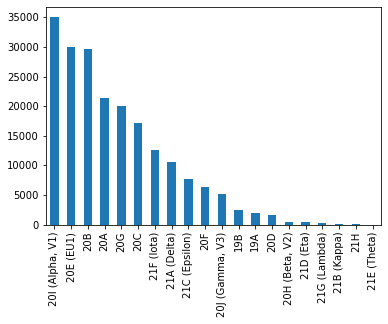

In [11]:
y_train.value_counts().plot(kind='bar')

In [12]:
X_test

,66,201,203,204,210,222,241,445,733,913,...,29753,29754,29755,29756,29757,29758,29759,29760,29764,29834
157347,0,4,2,0,0,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148904,0,0,0,0,0,0,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
218691,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4929,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70730,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135302,0,0,0,0,0,0,2,0,0,2,...,0,0,0,0,0,0,0,0,0,0
4359,0,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
237927,2,0,0,0,0,0,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0
274470,0,0,0,2,0,0,2,4,0,0,...,0,0,0,0,0,0,0,0,0,0


# Machine Learning 
The machine learning models that were used in training was from the scikit learn 0.24.2 library.
<br>
<br>
Machine learning models trained in this notebook:
- Multinomial Logistic Regression: **99.80%**
- Random Forest Classifier: **99.87%**
- Support Vector Machine: **99.76%**
- K Nearest Neighbors: **99.71**

## Mulitnomial Logistic Regression (LR)

In [13]:
from sklearn.linear_model import LogisticRegression

### Train the model with no hyperparameter tuning (LR)

In [14]:
LR= LogisticRegression(random_state = 0)

LR.fit(X_train,y_train)

D:\Program Files - Data Drive\Anaconda 3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

### Accuracy score on the test set after training (LR)

In [15]:
from sklearn.metrics import accuracy_score

y_pred = LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.80%


### Classification report on the test set (LR)

In [16]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

            19A       0.98      0.98      0.98       836
            19B       1.00      1.00      1.00      1007
            20A       1.00      1.00      1.00      9309
            20B       1.00      1.00      1.00     12838
            20C       0.99      0.99      0.99      7283
            20D       1.00      1.00      1.00       715
      20E (EU1)       1.00      1.00      1.00     12710
            20F       1.00      1.00      1.00      2774
            20G       1.00      1.00      1.00      8562
 20H (Beta, V2)       0.99      0.99      0.99       176
20I (Alpha, V1)       1.00      1.00      1.00     15024
20J (Gamma, V3)       1.00      1.00      1.00      2262
    21A (Delta)       1.00      1.00      1.00      4516
    21B (Kappa)       1.00      0.98      0.99        54
  21C (Epsilon)       1.00      1.00      1.00      3310
      21D (Eta)       1.00      1.00      1.00       167
    21E (Theta)       1.00    

## Random Forest Classifier (RF)

### Train the model with no hyperparameter tuning (RF)

In [17]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

### Accuracy score on the test set after training (RF)

In [18]:
from sklearn.metrics import accuracy_score

y_pred = RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.87%


### Classification report on the test set (RF)

In [19]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

            19A       0.98      0.99      0.98       836
            19B       1.00      1.00      1.00      1007
            20A       1.00      1.00      1.00      9309
            20B       1.00      1.00      1.00     12838
            20C       0.99      1.00      1.00      7283
            20D       1.00      1.00      1.00       715
      20E (EU1)       1.00      1.00      1.00     12710
            20F       1.00      1.00      1.00      2774
            20G       1.00      1.00      1.00      8562
 20H (Beta, V2)       1.00      0.99      1.00       176
20I (Alpha, V1)       1.00      1.00      1.00     15024
20J (Gamma, V3)       1.00      1.00      1.00      2262
    21A (Delta)       1.00      1.00      1.00      4516
    21B (Kappa)       1.00      1.00      1.00        54
  21C (Epsilon)       1.00      1.00      1.00      3310
      21D (Eta)       1.00      1.00      1.00       167
    21E (Theta)       1.00    

### Export the Model for future use and testing (RF)

In [20]:
import pickle


pickle_filename = "Random_Forest_Model.pkl"  

with open(pickle_filename, 'wb') as file:  
    pickle.dump(RF, file)

### Feature Importance for Random Forest

In [21]:
import time

start_time = time.time()
importances = RF.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in RF.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.019 seconds


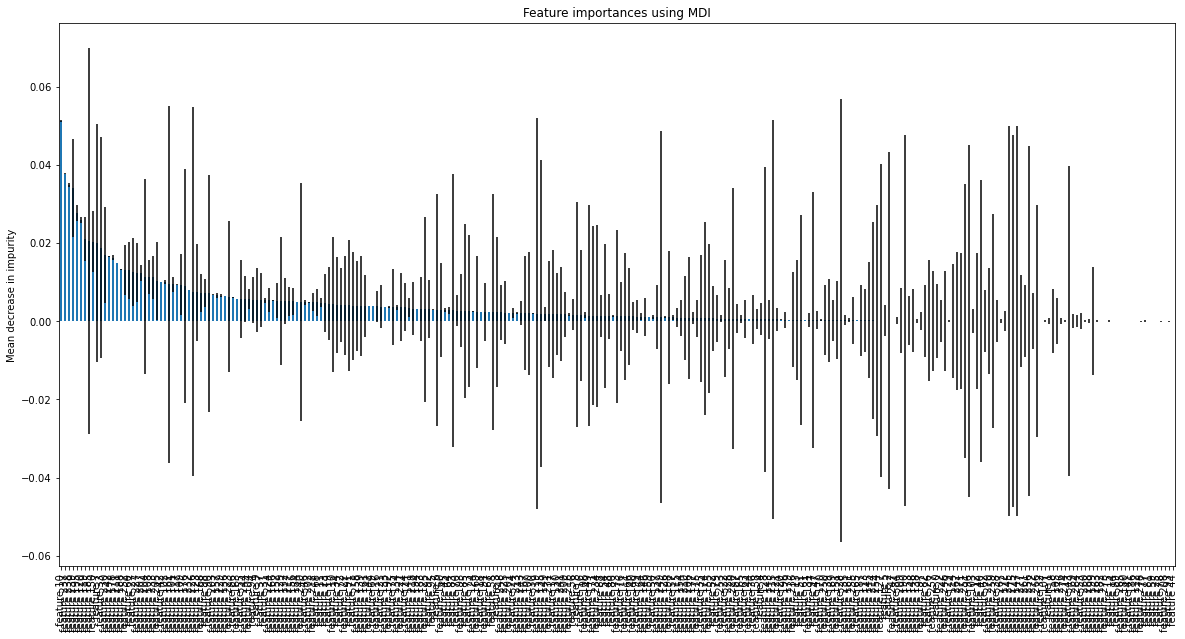

In [22]:
import matplotlib.pyplot as plt

feature_names = [f'feature {i}' for i in range(X.shape[1])]

forest_importances = pd.Series(importances, index=feature_names)
forest_importances.sort_values(inplace=True,ascending=False)


fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.set_size_inches(20, 10)


## Support Vector Machine (SVM)

### Train the model with no hyperparameter tuning (SVM)

In [23]:
from sklearn.svm import SVC

SVM=SVC(gamma='auto',random_state=0)

SVM.fit(X_train,y_train)

SVC(gamma='auto', random_state=0)

### Accuracy score on the test set after training (SVM)

In [24]:
from sklearn.metrics import accuracy_score

y_pred = SVM.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.76%


### Classification report on the test set (SVM)

In [25]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

D:\Program Files - Data Drive\Anaconda 3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Program Files - Data Drive\Anaconda 3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

            19A       0.97      0.98      0.98       836
            19B       1.00      0.99      1.00      1007
            20A       0.99      1.00      0.99      9309
            20B       1.00      1.00      1.00     12838
            20C       0.99      0.99      0.99      7283
            20D       1.00      0.99      1.00       715
      20E (EU1)       1.00      1.00      1.00     12710
            20F       1.00      1.00      1.00      2774
            20G       1.00      1.00      1.00      8562
 20H (Beta, V2)       1.00      0.98      0.99       176
20I (Alpha, V1)       1.00      1.00      1.00     15024
20J (Gamma, V3)       1.00      1.00      1.00      2262
    21A (Delta)       1.00      1.00      1.00      4516
    21B (Kappa)       1.00      1.00      1.00        54
  21C (Epsilon)       1.00      1.00      1.00      3310
      21D (Eta)       1.00      0.99      1.00       167
    21E (Theta)       0.00    

D:\Program Files - Data Drive\Anaconda 3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## K-Nearest Neighbors (KNN)

### Train the model with no hyperparameter tuning (KNN)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(random_state=0)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

### Accuracy score on the test set after training (KNN)

In [27]:
y_pred = KNN.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.71%


### Classification report on the test set (KNN)

In [28]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

            19A       0.97      0.98      0.97       836
            19B       1.00      0.99      1.00      1007
            20A       0.99      1.00      0.99      9309
            20B       1.00      1.00      1.00     12838
            20C       0.99      0.99      0.99      7283
            20D       1.00      0.99      0.99       715
      20E (EU1)       1.00      1.00      1.00     12710
            20F       1.00      1.00      1.00      2774
            20G       1.00      1.00      1.00      8562
 20H (Beta, V2)       1.00      0.98      0.99       176
20I (Alpha, V1)       1.00      1.00      1.00     15024
20J (Gamma, V3)       1.00      1.00      1.00      2262
    21A (Delta)       1.00      1.00      1.00      4516
    21B (Kappa)       1.00      1.00      1.00        54
  21C (Epsilon)       1.00      1.00      1.00      3310
      21D (Eta)       1.00      0.99      1.00       167
    21E (Theta)       1.00    

### K-Fold Cross Validation for Random Forest (Best performing model)

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

CV = KFold(n_splits=10, random_state=1, shuffle=True)

RF = RandomForestClassifier(random_state=0)


scores = cross_val_score(RF, X, y, scoring='accuracy', cv=CV, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.998 (0.000)


### Breakdown per K-Fold

> folds=2, accuracy=0.998 (0.998,0.998)
> folds=3, accuracy=0.998 (0.998,0.998)
> folds=4, accuracy=0.998 (0.998,0.999)
> folds=5, accuracy=0.998 (0.998,0.999)
> folds=6, accuracy=0.998 (0.998,0.999)
> folds=7, accuracy=0.998 (0.998,0.999)
> folds=8, accuracy=0.999 (0.998,0.999)
> folds=9, accuracy=0.998 (0.998,0.999)
> folds=10, accuracy=0.998 (0.998,0.999)


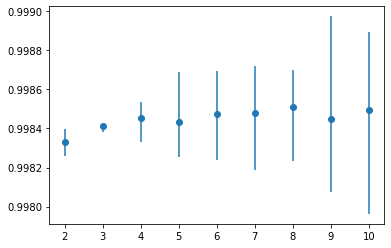

In [32]:
from sklearn.model_selection import LeaveOneOut

def evaluate_model(cv):
    # get the model
    model = RandomForestClassifier(random_state=0)
    # evaluate the model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    # return scores
    return mean(scores), scores.min(), scores.max()



# define folds to test
folds = [2,3,4,5,6,7,8,9,10]
# record mean and min/max of each set of results
means, mins, maxs = list(),list(),list()
# evaluate each k value
for k in folds:
    # define the test condition
    cv = KFold(n_splits=k, shuffle=True, random_state=1)
    # evaluate k value
    k_mean, k_min, k_max = evaluate_model(cv)
    # report performance
    print('> folds=%d, accuracy=%.3f (%.3f,%.3f)' % (k, k_mean, k_min, k_max))
    # store mean accuracy
    means.append(k_mean)
    # store min and max relative to the mean
    mins.append(k_mean - k_min)
    maxs.append(k_max - k_mean)
# line plot of k mean values with min/max error bars
plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')

# show the plot
plt.show()